In [1]:
from pandas.io import gbq
import pandas as pd
import matplotlib.pyplot as plt

bq_project = "thesis-jaeyoon"

In [82]:
gp_query= """
select 
	*
from 
	(
	select
		p.publication_number,
		p.application_number,
		p.country_code,
		p.priority_date,
    p.family_id,
    p.entity_status,
		STRING_AGG(DISTINCT ipcs.code) as ipc_codes,
    STRING_AGG(DISTINCT assignees) as assignees,
    STRING_AGG(DISTINCT uspcs.code) as uspc_codes,
    STRING_AGG(DISTINCT pc.publication_number) as priority_publication_number,
    STRING_AGG(DISTINCT cit.publication_number) as citations,
    STRING_AGG(DISTINCT ah.name) as assignees_harmonized,
    title.text as title_text,
    title.language as title_lang,
    abstract.text as abstract_text,
    abstract.language as abstract_lang
 	FROM
	  `patents-public-data.patents.publications` AS p
  LEFT JOIN UNNEST(p.ipc) AS ipcs
  LEFT JOIN UNNESt(p.uspc) AS uspcs
  LEFT JOIN UNNEST(p.assignee) AS assignees
  LEFT JOIN UNNEST(p.title_localized) AS title
  LEFT JOIN UNNEST(p.abstract_localized) AS abstract
  LEFT JOIN UNNEST(p.priority_claim) AS pc 
  LEFT JOIN UNNEST(p.citation) as cit
  LEFT JOIN UNNEST(p.assignee_harmonized) as ah
	GROUP BY 
    p.publication_number, p.application_number, p.country_code, 
		p.priority_date, p.family_id, p.entity_status, title.text, title.language,
		abstract.text, abstract.language
	)
where 
	ipc_codes LIKE '%A61J1/%' OR ipc_codes LIKE '%A61J3/%' OR
  ipc_codes LIKE '%A61K9/%' OR ipc_codes LIKE '%A61K31/%' OR
  ipc_codes LIKE '%A61K33/%' OR ipc_codes LIKE '%A61K35/%' OR
  ipc_codes LIKE '%A61K36/%' OR ipc_codes LIKE '%A61K41/%' OR
  ipc_codes LIKE '%A61K49/%' OR ipc_codes LIKE '%A61K51/%' OR
  ipc_codes LIKE '%A61K39/%' OR ipc_codes LIKE '%A61K45/%' OR
  ipc_codes LIKE '%A61K47/%' OR ipc_codes LIKE '%A61K48/%' OR
  ipc_codes LIKE '%A61P/%' OR
	uspc_codes LIKE '%424/%' OR uspc_codes LIKE '%514/%' 
"""

In [84]:
gp_df = gbq.read_gbq(
            query=gp_query,
            project_id=bq_project,
            verbose=True,
            dialect='standard')

In [86]:
gp_df.to_csv("google_patents.csv", index=False, sep='\t')

In [3]:
gp_df = pd.read_csv("google_patents.csv", sep='\t')

In [4]:
gp_df.head()

,publication_number,application_number,country_code,priority_date,family_id,entity_status,ipc_codes,assignees,uspc_codes,priority_publication_number,citations,assignees_harmonized,title_text,title_lang,abstract_text,abstract_lang
0,CA-2092567-A1,CA-2092567-A,CA,19900925,27080108,NaN,"C07K14/48,C12P21/00,C12P21/08,C12Q1/68,C07K14/...","Genentech, Inc.,Arnon Rosenthal",NaN,NaN,NaN,GENENTECH INC,Facteur neurotrophique nt-4,fr,"A novel polypeptide, designated neurotrophic f...",en
1,EP-1922069-A2,EP-06800882-A,EP,20050808,37727976,NaN,"A01N43/42,A61K31/44","Nitromed, Inc.",NaN,NaN,NaN,NITROMED INC,Composes antagonistes de l&#39;angiotensine ii...,fr,The invention describes compositions and kits ...,en
2,US-2007173544-A1,US-55458604-A,US,20030430,33434973,NaN,"A61K31/24,A61K/,A61K31/19,A61K31/21,A61K31/235","Hodge Kirvin L,Von Borstel Reid W,Shalini Sharma",514/506.,NaN,"US-5665387-A,US-2006035970-A1,US-6858602-B2,US...","HODGE KIRVIN L,VON BORSTEL REID W,SHARMA SHALINI",Compounds for the treatment of metabolic disor...,en,Agents useful for the treatment of various met...,en
3,CN-101111494-A,CN-200580047477-A,CN,20041129,36218221,NaN,"C07D231/56,A61K31/416,C07D471/04,A61K31/4162,A...",沃纳-兰伯特有限公司,NaN,NaN,NaN,WARNER LAMBERT CO,"Therapeutic pyrazolo[3,4-b]pyridines and indaz...",en,本发明提供了式I的化合物或其药学上可接受的盐，其中：R2，R3，R4，R5，R6，R7，X和...,zh
4,CN-108272975-A,CN-201810277181-A,CN,20180330,62810646,NaN,"A61P19/02,A61K36/8994,A61K36/90",重庆正刚中医骨科医院有限公司,NaN,NaN,NaN,NaN,损伤药方,zh,本发明属于中药配方及其制备方法技术领域，公开了种损伤药方，包括红花、桃仁、威灵仙、秦艽、杜仲...,zh


In [5]:
gp_df.shape

(8187256, 16)

In [10]:
gp_df = gp_df.drop("priority_publication_number", axis=1)

In [9]:
gp_df.publication_number.nunique()

3304450

In [27]:
gp_df_clean = gp_df.drop(["title_text", "title_lang", "abstract_text", "abstract_lang"], axis=1)

In [28]:
gp_df_clean = gp_df_clean.drop_duplicates()

In [32]:
gp_df_clean.drop_duplicates(["publication_number", "application_number", "country_code", "priority_date", 
       "family_id", "entity_status"],inplace=True)

In [34]:
gp_df_clean.to_csv("google_patents_clean.csv", index=False, sep='\t')

In [35]:
gp_df_clean.head()

,publication_number,application_number,country_code,priority_date,family_id,entity_status,ipc_codes,assignees,uspc_codes,citations,assignees_harmonized
0,CA-2092567-A1,CA-2092567-A,CA,19900925,27080108,NaN,"C07K14/48,C12P21/00,C12P21/08,C12Q1/68,C07K14/...","Genentech, Inc.,Arnon Rosenthal",NaN,NaN,GENENTECH INC
1,EP-1922069-A2,EP-06800882-A,EP,20050808,37727976,NaN,"A01N43/42,A61K31/44","Nitromed, Inc.",NaN,NaN,NITROMED INC
2,US-2007173544-A1,US-55458604-A,US,20030430,33434973,NaN,"A61K31/24,A61K/,A61K31/19,A61K31/21,A61K31/235","Hodge Kirvin L,Von Borstel Reid W,Shalini Sharma",514/506.,"US-5665387-A,US-2006035970-A1,US-6858602-B2,US...","HODGE KIRVIN L,VON BORSTEL REID W,SHARMA SHALINI"
3,CN-101111494-A,CN-200580047477-A,CN,20041129,36218221,NaN,"C07D231/56,A61K31/416,C07D471/04,A61K31/4162,A...",沃纳-兰伯特有限公司,NaN,NaN,WARNER LAMBERT CO
4,CN-108272975-A,CN-201810277181-A,CN,20180330,62810646,NaN,"A61P19/02,A61K36/8994,A61K36/90",重庆正刚中医骨科医院有限公司,NaN,NaN,NaN


In [36]:
gp_df_clean.groupby("country_code")["publication_number"].count()

country_code
BE     13078
CA    195290
CN    589631
DE    155745
DK     69564
EP    408976
ES     93092
FI     36863
FR     57505
GB     49442
JP    443025
KR    130256
LU      3907
NL     19209
RU     62764
US    663030
WO    313073
Name: publication_number, dtype: int64

In [37]:
gp_df.family_id.nunique()

1090822

In [96]:
sum(gp_df.ipc_codes.isnull())

4587

check FDA Orangebook: any patents missing?

In [39]:
ob_patent_dir = "orangebook/patent.txt"
ob_patent = pd.read_csv(ob_patent_dir, sep="~")

In [97]:
ob_patent

,Appl_Type,Appl_No,Product_No,Patent_No,Patent_Expire_Date_Text,Drug_Substance_Flag,Drug_Product_Flag,Patent_Use_Code,Delist_Flag,Submission_Date,patent_number
0,N,20571,1,6403569,"Apr 28, 2020",NaN,NaN,U-449,NaN,NaN,6403569
1,N,20571,1,6794370,"May 1, 2020",NaN,NaN,U-606,NaN,NaN,6794370
2,N,20571,2,6403569,"Apr 28, 2020",NaN,NaN,U-449,NaN,NaN,6403569
3,N,20571,2,6794370,"May 1, 2020",NaN,NaN,U-606,NaN,NaN,6794370
4,N,20610,1,7452872,"Aug 24, 2026",NaN,NaN,U-141,NaN,NaN,7452872
5,N,20610,1,7625884,"Aug 24, 2026",NaN,NaN,U-141,NaN,NaN,7625884
6,N,20629,1,6469015,"Oct 22, 2019",NaN,NaN,U-501,NaN,NaN,6469015
7,N,20629,1,6579981,"Jun 17, 2020",NaN,NaN,U-501,NaN,NaN,6579981
8,N,20667,1,6001861,"Jan 16, 2018",NaN,NaN,U-784,NaN,NaN,6001861
9,N,20667,1,6194445,"Jan 16, 2018",NaN,NaN,U-784,NaN,NaN,6194445


In [83]:
ob_patent["patent_number"] = ob_patent["Patent_No"].apply(lambda x: re.sub("\D", "", x))

In [94]:
pd.DataFrame(ob_patent.patent_number.unique()).to_csv("orangebook.seed.csv", index=False)

In [85]:
ob_patent_Nos = list(ob_patent.patent_number.unique())

In [86]:
len(ob_patent_Nos)

4326

In [87]:
where_clause = ",".join("'" + ob_patent.patent_number.unique() + "'")

In [88]:
ob_query = '''
    select
		p.publication_number,
		p.application_number,
		p.country_code,
		p.priority_date,
    p.family_id,
    p.entity_status,
		STRING_AGG(DISTINCT ipcs.code) as ipc_codes,
    STRING_AGG(DISTINCT assignees) as assignees,
    STRING_AGG(DISTINCT uspcs.code) as uspc_codes,
    STRING_AGG(DISTINCT pc.publication_number) as priority_publication_number,
    STRING_AGG(DISTINCT cit.publication_number) as citations,
    STRING_AGG(DISTINCT ah.name) as assignees_harmonized,
    title.text as title_text,
    title.language as title_lang,
    abstract.text as abstract_text,
    abstract.language as abstract_lang
 	FROM
	  `patents-public-data.patents.publications` AS p
  LEFT JOIN UNNEST(p.ipc) AS ipcs
  LEFT JOIN UNNESt(p.uspc) AS uspcs
  LEFT JOIN UNNEST(p.assignee) AS assignees
  LEFT JOIN UNNEST(p.title_localized) AS title
  LEFT JOIN UNNEST(p.abstract_localized) AS abstract
  LEFT JOIN UNNEST(p.priority_claim) AS pc 
  LEFT JOIN UNNEST(p.citation) as cit
  LEFT JOIN UNNEST(p.assignee_harmonized) as ah
    WHERE
        REGEXP_EXTRACT(p.publication_number, r'\w+-(\d+)-\w+') IN
        (
        {}
        )
	GROUP BY 
    p.publication_number, p.application_number, p.country_code, 
		p.priority_date, p.family_id, p.entity_status, title.text, title.language,
		abstract.text, abstract.language
    '''.format(where_clause)

In [89]:
ob_df = gbq.read_gbq(
            query=ob_query,
            project_id=bq_project,
            verbose=True,
            dialect='standard')

In [92]:
ob_df.to_csv("ob_patents.csv", index=False, sep='\t')

In [51]:
ob_df = pd.read_csv("ob_patents.csv", sep='\t')

In [52]:
ob_df

,publication_number,application_number,country_code,priority_date,family_id,entity_status,ipc_codes,assignees,uspc_codes,priority_publication_number,citations,assignees_harmonized,title_text,title_lang,abstract_text,abstract_lang
0,CA-44186-A,CA-44186D-A,CA,0,45160726,NaN,NaN,"Francois Schmalz,Photo-Litho Transfer Co.",NaN,NaN,NaN,"PHOTO LITHO TRANSFER CO,SCHMALZ FRANCOIS",Methode de production d&#39;ornementation,fr,NaN,NaN
1,CA-43797-S,CA-43797-F,CA,0,49719783,NaN,NaN,Lucas Film Ltd,NaN,NaN,NaN,LUCAS FILM LTD,Spacecraft,en,NaN,NaN
2,CA-44874-A,CA-44874D-A,CA,0,45161414,NaN,NaN,Thomas James Mcbride,NaN,NaN,NaN,MCBRIDE THOMAS JAMES,Cultivator,en,NaN,NaN
3,CA-44733-A,CA-44733D-A,CA,0,45161273,NaN,NaN,Powers Jay Woodward,NaN,NaN,NaN,WOODWARD POWERS JAY,Machine a vapeur,fr,NaN,NaN
4,CA-44638-S,CA-44638-F,CA,0,49719916,NaN,NaN,Pierre De Sancy,NaN,NaN,NaN,PIERRE DE SANCY,Distributeur de fluide,en,NaN,NaN
5,CA-44847-A,CA-44847D-A,CA,0,45161387,NaN,NaN,John Elzear Ennis,NaN,NaN,NaN,ENNIS JOHN ELZEAR,Echafaud,fr,NaN,NaN
6,CA-43834-A,CA-43834D-A,CA,0,45160374,NaN,NaN,George E. Briggs,NaN,NaN,NaN,BRIGGS GEORGE E,Building block or bricks,en,NaN,NaN
7,CA-40812-A,CA-40812D-A,CA,0,45157352,NaN,NaN,"Christopher Columbus Reynolds,Henry William Ho...",NaN,NaN,NaN,"REYNOLDS CHRISTOPHER COLUMBUS,HOOTON HENRY WIL...",Brake,en,NaN,NaN
8,CA-46276-S,CA-46276-F,CA,0,49720171,NaN,NaN,Bell Canada,NaN,NaN,NaN,BELL CANADA,Telephone display set base,en,NaN,NaN
9,CA-43932-A,CA-43932D-A,CA,0,45160472,NaN,NaN,Carl Heinemann,NaN,NaN,NaN,HEINEMANN CARL,Appareil pour suspendre les echafaudages,fr,NaN,NaN


In [100]:
ob_df_clean = ob_df.drop(["title_text", "title_lang", "abstract_text", "abstract_lang", "priority_publication_number"], axis=1)

In [103]:
ob_df_clean = ob_df_clean.drop_duplicates()

In [111]:
ob_df_clean.drop_duplicates(["publication_number", "application_number", "country_code", "priority_date", 
       "family_id", "entity_status"],inplace=True)

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
ob_df_clean.to_csv("ob_patents_clean.csv", index=False, sep='\t')

In [122]:
all_patents = pd.concat([gp_df_clean, ob_df_clean])

In [123]:
all_patents = all_patents.reset_index(drop=True)
all_patents.drop_duplicates(["publication_number", "application_number", "country_code", "priority_date", 
       "family_id", "entity_status"],inplace=True)

In [128]:
all_patents

,publication_number,application_number,country_code,priority_date,family_id,entity_status,ipc_codes,assignees,uspc_codes,citations,assignees_harmonized,priority_year
0,CA-2092567-A1,CA-2092567-A,CA,19900925,27080108,NaN,"C07K14/48,C12P21/00,C12P21/08,C12Q1/68,C07K14/...","Genentech, Inc.,Arnon Rosenthal",NaN,NaN,GENENTECH INC,1990
1,EP-1922069-A2,EP-06800882-A,EP,20050808,37727976,NaN,"A01N43/42,A61K31/44","Nitromed, Inc.",NaN,NaN,NITROMED INC,2005
2,US-2007173544-A1,US-55458604-A,US,20030430,33434973,NaN,"A61K31/24,A61K/,A61K31/19,A61K31/21,A61K31/235","Hodge Kirvin L,Von Borstel Reid W,Shalini Sharma",514/506.,"US-5665387-A,US-2006035970-A1,US-6858602-B2,US...","HODGE KIRVIN L,VON BORSTEL REID W,SHARMA SHALINI",2003
3,CN-101111494-A,CN-200580047477-A,CN,20041129,36218221,NaN,"C07D231/56,A61K31/416,C07D471/04,A61K31/4162,A...",沃纳-兰伯特有限公司,NaN,NaN,WARNER LAMBERT CO,2004
4,CN-108272975-A,CN-201810277181-A,CN,20180330,62810646,NaN,"A61P19/02,A61K36/8994,A61K36/90",重庆正刚中医骨科医院有限公司,NaN,NaN,NaN,2018
5,CN-107007468-A,CN-201710412183-A,CN,20170605,59452231,NaN,A61J3/07,青岛宏达自动化科技有限公司,NaN,NaN,QINGDAO HONGDA AUTOMATION TECH CO LTD,2017
6,EP-0573568-B1,EP-92907711-A,EP,19910301,24659568,NaN,"A61K31/44,A61K31/455,A61P25/00,C07D401/06,A61P...","University Of Florida Research Foundation, Inc.",NaN,NaN,UNIV FLORIDA,1991
7,EP-1210335-B1,EP-00951526-A,EP,19990820,7918987,NaN,"C07D405/06,C07D401/06,C07D235/14,A61P37/08,C07...",Boehringer Ingelheim Pharma GmbH &amp; Co.KG,NaN,NaN,BOEHRINGER INGELHEIM PHARMA,1999
8,JP-2010159300-A,JP-2010098640-A,JP,19980617,22218835,NaN,"A61K31/4178,A61P25/00,A61P9/10,A61K31/4184,A61...",ブリストル−マイヤーズ スクイブ カンパニーＢｒｉｓｔｏｌ−Ｍｙｅｒｓ Ｓｑｕｉｂｂ ...,NaN,"JP-H05279257-A,","SANOFI AVENTIS,BRISTOL MYERS SQUIBB CO",1998
9,CN-1850096-A,CN-200610058795-A,CN,20060303,37131608,NaN,"A61K9/107,A61K31/704,A61P35/00,A61K47/44",大道隆达（北京）医药科技发展有限公司,NaN,NaN,DADAOLONGDA BEIJING PHARMACEUT,2006


In [2]:
#all_patents.to_csv("all_patents.csv", sep='\t', index=False)
all_patents = pd.read_csv("all_patents.csv", sep='\t')

In [28]:
all_patents["priority_year"]= all_patents["priority_date"].apply(lambda x: int(str(x)[0:4]))
patent_count_by_year = all_patents.groupby(["priority_year", "country_code"])["publication_number"].count()

In [31]:
patent_count_by_year = patent_count_by_year.reset_index()

In [39]:
patent_count_by_year = patent_count_by_year.loc[(patent_count_by_year.priority_year >= 1975) & 
                                                (patent_count_by_year.priority_year <= 2012)]

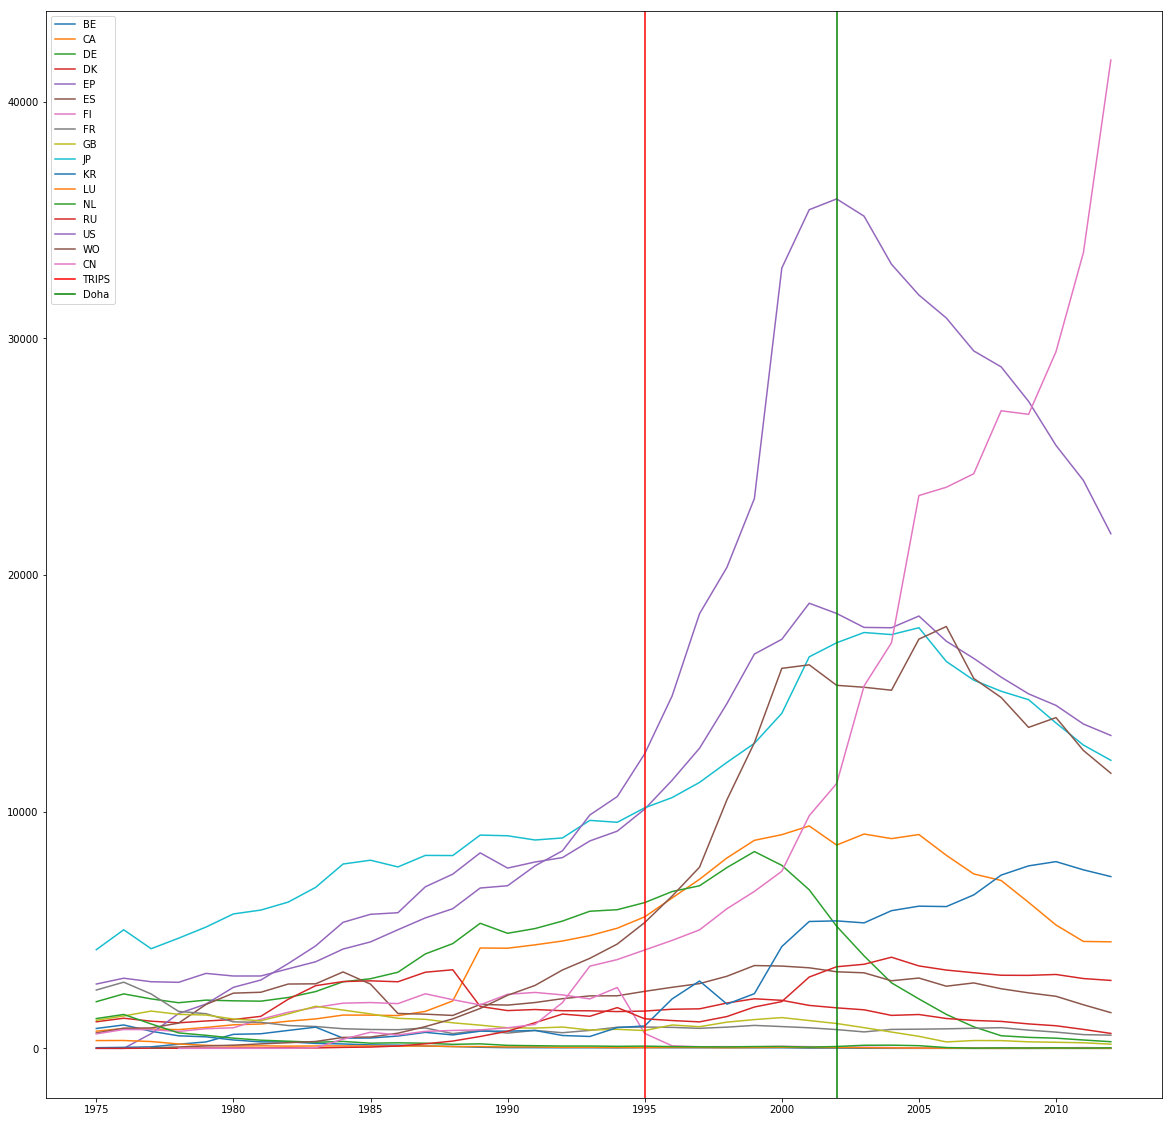

In [76]:
plt.figure(figsize=(20,20))
countries = patent_count_by_year.country_code.unique()
for c in countries:
    country_patent = patent_count_by_year.loc[patent_count_by_year.country_code==c]
    x=country_patent.priority_year
    y=country_patent.publication_number
    plt.plot(x,y, label=c)
plt.axvline(x=1995, color="red", label="TRIPS")
plt.axvline(x=2002, color="green", label="Doha")
plt.legend()

In [45]:
all_patent_count_by_year = patent_count_by_year.groupby(["priority_year"])["publication_number"].sum().reset_index()

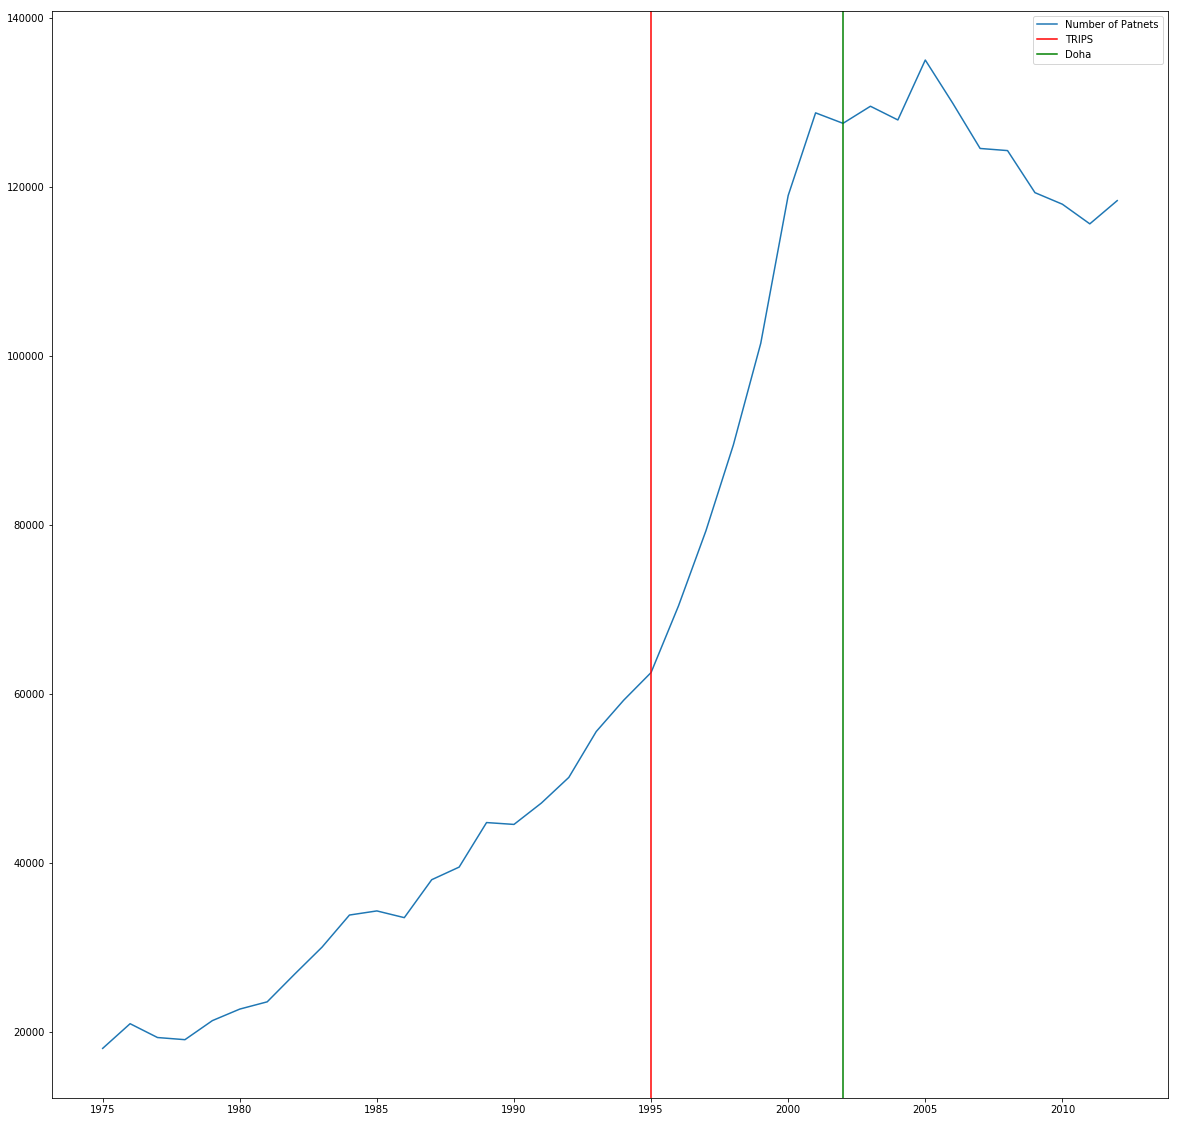

In [72]:
plt.figure(figsize=(20,20))

x=all_patent_count_by_year.priority_year
y=all_patent_count_by_year.publication_number
plt.plot(x,y, label="Number of Patnets")
plt.axvline(x=1995, color="red", label="TRIPS")
plt.axvline(x=2002, color="green",label="Doha")
plt.legend()

In [49]:
patent_count_by_year

,priority_year,country_code,publication_number
595,1975,BE,842
596,1975,CA,729
597,1975,DE,1974
598,1975,DK,1125
599,1975,EP,1
600,1975,ES,652
601,1975,FI,613
602,1975,FR,2467
603,1975,GB,1186
604,1975,JP,4172


## DRUGBANK

In [77]:
db_df = pd.read_csv("drugbank.csv", sep='\t')

In [89]:
db_df.head()

,type,drugbank_id,name,groups,indication,patents,target,categories,products
0,biotech,DB00001,lepirudin,approved,For the treatment of heparin-induced thrombocy...,5180668,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Refludan|lepirudin
1,biotech,DB00002,cetuximab,approved,"Cetuximab, used in combination with irinotecan...",1340417,Epidermal growth factor receptor|Low affinity ...,"Amino Acids, Peptides, and Proteins|Antibodies...",Erbitux|cetuximab
2,biotech,DB00003,dornase alfa,approved,Used as adjunct therapy in the treatment of cy...,2137237|2184581,DNA,"Amino Acids, Peptides, and Proteins|Cough and ...",Pulmozyme|Pulmozyme 1mg/ml|dornase alfa
3,biotech,DB00005,etanercept,approved|investigational,Etanercept is indicated for the treatment of m...,2123593|2476934|7276477,Tumor necrosis factor|Tumor necrosis factor re...,"Agents reducing cytokine levels|Amino Acids, P...",Brenzys|Enbrel|Erelzi|etanercept
4,small molecule,DB00006,bivalirudin,approved|investigational,For treatment of heparin-induced thrombocytope...,2065150|5196404|7582727|7598343,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Angiomax|Bivalirudin|Bivalirudin for Injection...


In [83]:
db_df = db_df.loc[~db_df.patents.isnull()].reset_index(drop=True)

In [85]:
db_patents = db_df.apply(lambda x: pd.Series(x["patents"].split("|")), axis=1).stack().reset_index(level=1, drop=True)

In [91]:
db_patents.name="patent_id"
db_df = db_df.join(db_patents).reset_index(drop=True)

In [97]:
db_df["patent_id"] = db_df["patent_id"].apply(int)

ValueError: invalid literal for int() with base 10: 'RE40812'

In [99]:
db_df

,type,drugbank_id,name,groups,indication,patents,target,categories,products,patent_id
0,biotech,DB00001,lepirudin,approved,For the treatment of heparin-induced thrombocy...,5180668,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Refludan|lepirudin,5180668
1,biotech,DB00002,cetuximab,approved,"Cetuximab, used in combination with irinotecan...",1340417,Epidermal growth factor receptor|Low affinity ...,"Amino Acids, Peptides, and Proteins|Antibodies...",Erbitux|cetuximab,1340417
2,biotech,DB00003,dornase alfa,approved,Used as adjunct therapy in the treatment of cy...,2137237|2184581,DNA,"Amino Acids, Peptides, and Proteins|Cough and ...",Pulmozyme|Pulmozyme 1mg/ml|dornase alfa,2137237
3,biotech,DB00003,dornase alfa,approved,Used as adjunct therapy in the treatment of cy...,2137237|2184581,DNA,"Amino Acids, Peptides, and Proteins|Cough and ...",Pulmozyme|Pulmozyme 1mg/ml|dornase alfa,2184581
4,biotech,DB00005,etanercept,approved|investigational,Etanercept is indicated for the treatment of m...,2123593|2476934|7276477,Tumor necrosis factor|Tumor necrosis factor re...,"Agents reducing cytokine levels|Amino Acids, P...",Brenzys|Enbrel|Erelzi|etanercept,2123593
5,biotech,DB00005,etanercept,approved|investigational,Etanercept is indicated for the treatment of m...,2123593|2476934|7276477,Tumor necrosis factor|Tumor necrosis factor re...,"Agents reducing cytokine levels|Amino Acids, P...",Brenzys|Enbrel|Erelzi|etanercept,2476934
6,biotech,DB00005,etanercept,approved|investigational,Etanercept is indicated for the treatment of m...,2123593|2476934|7276477,Tumor necrosis factor|Tumor necrosis factor re...,"Agents reducing cytokine levels|Amino Acids, P...",Brenzys|Enbrel|Erelzi|etanercept,7276477
7,small molecule,DB00006,bivalirudin,approved|investigational,For treatment of heparin-induced thrombocytope...,2065150|5196404|7582727|7598343,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Angiomax|Bivalirudin|Bivalirudin for Injection...,2065150
8,small molecule,DB00006,bivalirudin,approved|investigational,For treatment of heparin-induced thrombocytope...,2065150|5196404|7582727|7598343,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Angiomax|Bivalirudin|Bivalirudin for Injection...,5196404
9,small molecule,DB00006,bivalirudin,approved|investigational,For treatment of heparin-induced thrombocytope...,2065150|5196404|7582727|7598343,Prothrombin,"Amino Acids, Peptides, and Proteins|Anticoagul...",Angiomax|Bivalirudin|Bivalirudin for Injection...,7582727


# add descriptions

In [6]:
desc_query = """
select 
	publication_number,
  description_text,
  description_lang
from 
	(
	select
		p.publication_number,
    STRING_AGG(DISTINCT ipcs.code) as ipc_codes,
    STRING_AGG(DISTINCT uspcs.code) as uspc_codes,
    description.text as description_text,
    description.language as description_lang
 	FROM
	  `patents-public-data.patents.publications` AS p,
      UNNEST(p.description_localized) AS description
  LEFT JOIN UNNEST(p.ipc) AS ipcs
  LEFT JOIN UNNESt(p.uspc) AS uspcs
	GROUP BY 
    p.publication_number, ipcs.code, uspcs.code, description.text, description.language
	)
where 
	ipc_codes LIKE '%A61J1/%' OR ipc_codes LIKE '%A61J3/%' OR
  ipc_codes LIKE '%A61K9/%' OR ipc_codes LIKE '%A61K31/%' OR
  ipc_codes LIKE '%A61K33/%' OR ipc_codes LIKE '%A61K35/%' OR
  ipc_codes LIKE '%A61K36/%' OR ipc_codes LIKE '%A61K41/%' OR
  ipc_codes LIKE '%A61K49/%' OR ipc_codes LIKE '%A61K51/%' OR
  ipc_codes LIKE '%A61K39/%' OR ipc_codes LIKE '%A61K45/%' OR
  ipc_codes LIKE '%A61K47/%' OR ipc_codes LIKE '%A61K48/%' OR
  ipc_codes LIKE '%A61P/%' OR
	uspc_codes LIKE '%424/%' OR uspc_codes LIKE '%514/%' 
"""

In [4]:
desc_query = """

	select
		p.publication_number,
        description.text as description_text,
        description.language as description_lang
 	FROM
	  `patents-public-data.patents.publications` AS p,
      UNNEST(p.description_localized) AS description
  LEFT JOIN UNNEST(p.ipc) AS ipcs
  LEFT JOIN UNNESt(p.uspc) AS uspcs
  where
      ipcs.code LIKE '%A61J1/%' OR ipcs.code LIKE '%A61J3/%' OR
      ipcs.code LIKE '%A61K9/%' OR ipcs.code LIKE '%A61K31/%' OR
      ipcs.code LIKE '%A61K33/%' OR ipcs.code LIKE '%A61K35/%' OR
      ipcs.code LIKE '%A61K36/%' OR ipcs.code LIKE '%A61K41/%' OR
      ipcs.code LIKE '%A61K49/%' OR ipcs.code LIKE '%A61K51/%' OR
      ipcs.code LIKE '%A61K39/%' OR ipcs.code LIKE '%A61K45/%' OR
      ipcs.code LIKE '%A61K47/%' OR ipcs.code LIKE '%A61K48/%' OR
      ipcs.code LIKE '%A61P/%' OR
      uspcs.code LIKE '%424/%' OR uspcs.code LIKE '%514/%' 
"""

In [7]:
desc_df = gbq.read_gbq(
            query=desc_query,
            project_id=bq_project,
            verbose=False,
            dialect='standard')

/Users/jaeyoonjung/anaconda3/lib/python3.6/site-packages/pandas/io/gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


GenericGBQException: Reason: 403 GET https://www.googleapis.com/bigquery/v2/projects/thesis-jaeyoon/queries/350cfdfc-5853-4f44-83d1-7e15f8009b53?maxResults=0&timeoutMs=900&location=US: Response too large to return. Consider setting allowLargeResults to true in your job configuration. For more information, see https://cloud.google.com/bigquery/troubleshooting-errors

In [10]:
desc_df.head()

NameError: name 'desc_df' is not defined

In [ ]:
desc_df.to_csv("patent_description.csv", index=False, sep='\t')